# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = pd.read_csv('data/Bryant et al 2010.csv')
f.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [55]:
#Selecting the data as provided in the assignment for the dependent and independent variables
x = f.iloc[:, 2:11]
y = f.iloc[:, 15]

In [60]:
#Run the PRIM algorithm and select the first box it generates
from ema_workbench import analysis
from ema_workbench.analysis import prim
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

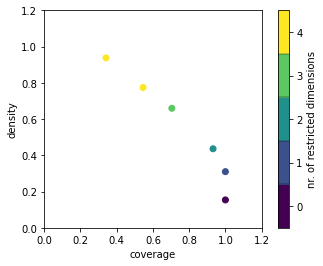

In [188]:
#Shows the default tradeoff in this box between coverage and density
box1.show_tradeoff()
plt.show()

coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



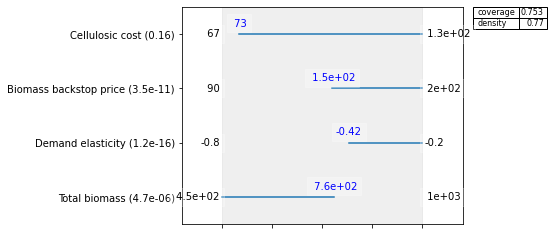

In [62]:
#Inspect the 21st element of specified box
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

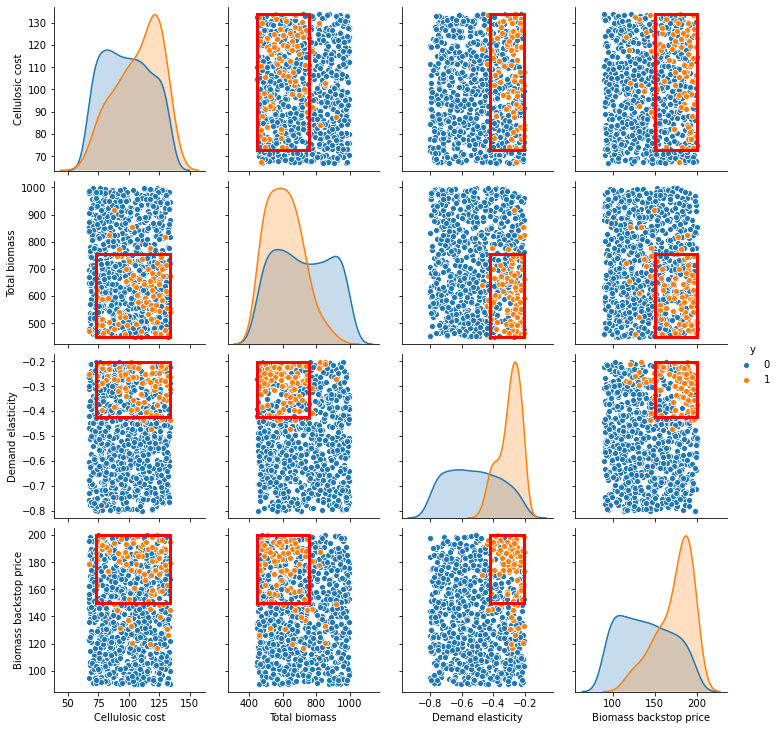

In [71]:
#Shows scatterplots with limits superimposed in red area
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [75]:
f2 = pd.read_csv('data/Rozenberg et al 2014.csv')
f2.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


In [82]:
x = f2.iloc[:, 0:7] #Independent variables
y1 = f2.iloc[:, 7]  #SSP1
y2 = f2.iloc[:, 8]  #SSP2
y3 = f2.iloc[:, 9]  #SSP3
y4 = f2.iloc[:, 10] #SSP4
y5 = f2.iloc[:, 11] #SSP5

In [117]:
prim_alg1 = prim.Prim(x, y1, threshold=0.8, peel_alpha=0.1)
prim_alg2 = prim.Prim(x, y2, threshold=0.5, peel_alpha=0.1)
prim_alg3 = prim.Prim(x, y3, threshold=0.8, peel_alpha=0.1)
prim_alg4 = prim.Prim(x, y4, threshold=0.8, peel_alpha=0.1)
prim_alg5 = prim.Prim(x, y5, threshold=0.3, peel_alpha=0.1)

box1 = prim_alg1.find_box()
box2 = prim_alg2.find_box()
box3 = prim_alg3.find_box()
box4 = prim_alg4.find_box()
box5 = prim_alg5.find_box()

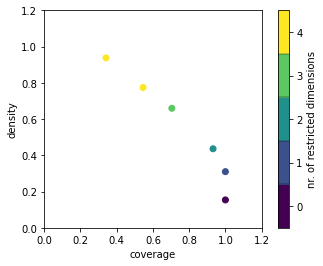

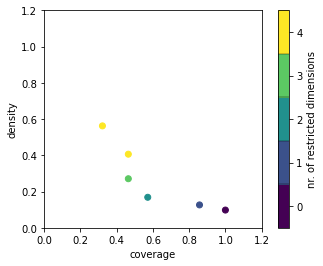

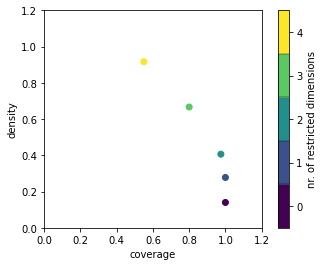

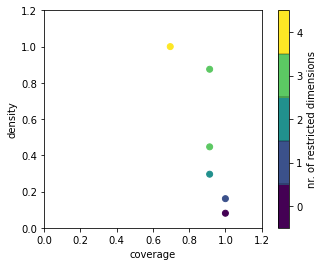

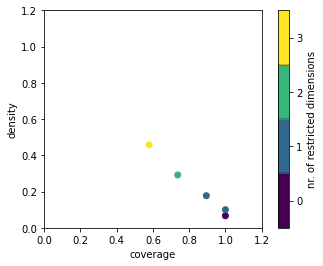

In [121]:
#Shows the default tradeoffs in this box between coverage and density
box1.show_tradeoff()
box2.show_tradeoff()
box3.show_tradeoff()
box4.show_tradeoff()
box5.show_tradeoff()
plt.show()

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [127]:
from ema_workbench import util
from ema_workbench.util import utilities
from ema_workbench.util.utilities import load_results

In [160]:
f3, outcomes = load_results('data/Hamarat et al 2013.gz')

In the cell below, first the outcome that is of interest is selected. The data is then configured in a boolean array.
It was found that some of the columns from the f3 dataframe above are categorical, which is not a common type outside of pandas. Therefore, these columns were changed to integer type columns instead. 

In [171]:
data = outcomes['fraction renewables']
y = data[:, 0] < data[:, -1]
for col in f3.columns:
    data_type = f3[col].dtypes.name
    if data_type != "float64":
        try:
            f3[col] = f3[col].astype(int)
        except Exception as e:
            print(f"Could not convert column '{col}' to float --> {e}")

After the code had been configured to the appropiate types, the `pca_preprocess` could be used with the function, while excluding the last two columns of the f3 dataframe - `model` and `policy`.

In [170]:
rotated_experiments, rotation_matrix = prim.pca_preprocess(f3, y, exclude=['model', 'policy'])

prim_obj = prim.Prim(rotated_experiments, y, threshold=0.8)
box = prim_obj.find_box()

box.show_tradeoff()
box.inspect(22)
plt.show()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

After having applies the pre-processing function, the plot indicates that the lowest density of the coverage has increased significantly. It is therefore save to assume that this process does have an impact on the results and can be useful to implement in future projects in order to increase the the density or coverage, depending on what is most crucial for the problem at hand.